machine learning algorithms are divided into 3 main categories
1-supervised
2-unsupervised
3-reinforcement learning
*supervised learning - we have either class label or target variable

*unsupervised learning- we do not have target variables
we use clustering of data to predict the output 
k means clustering is an algorithms used for unsupervised leaning

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
df=pd.read_csv("income.csv")
df.head()


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [11]:
print(len(df))

22


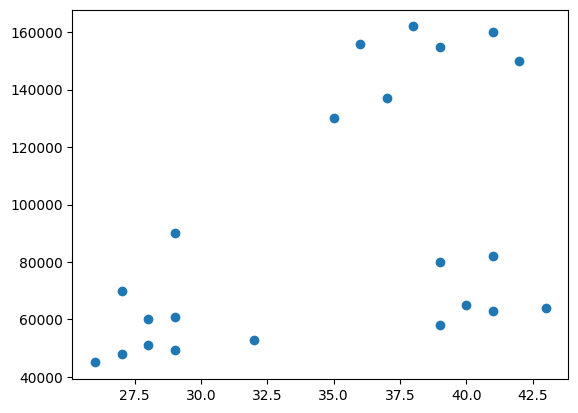

In [3]:
plt.scatter(df['Age'],df['Income($)'])

as above scatter plot it is clear that to choose the k=3 to form three clusters can be seen easily

In [6]:
km=KMeans(n_clusters=3)


<class 'sklearn.cluster._kmeans.KMeans'>


In [12]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
print(y_predicted)

[2 2 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 2 2 0]


to know which point is allocated to which cluster

In [13]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


now plot the scatter plot to see the clusters
first seperate all clusters differently

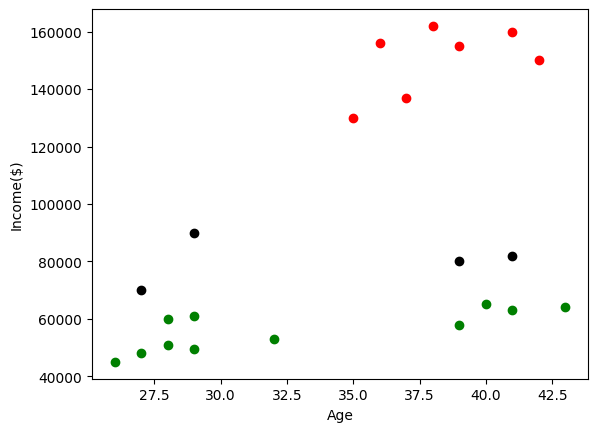

In [14]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()





above scatter shows that the black and the green is not clustered properly due to the x-scaling and the y-scaling
we need to prepocess the data before ploting using the
MinMaxScaler

In [22]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])


df.head()


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


now again using k means algo on scaled data

In [23]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
print(y_predicted)

[1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2]


In [25]:
df['cluster']=y_predicted
df.head()


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


here we have also got the cluster_centers

In [33]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

the 0th index is the x-axis and the 1st index is the y-axis

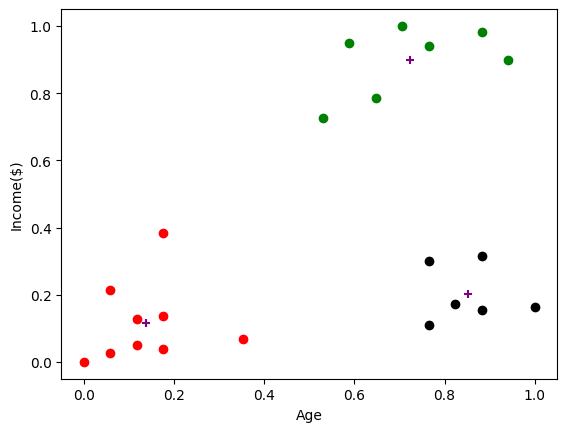

In [34]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()


now to know that which value of k is good enough to perform clustering?
to ans this use elbow method where we pass cluster value from 1-10 and after forming its graph where elbow lies that point is considred as best in sse(good point)/or the good k value

In [35]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

print(sse)

[5.434011511988177, 2.0911363886990766, 0.4750783498553095, 0.3491047094419564, 0.2766936276300278, 0.22443334487241415, 0.19852612571759054, 0.14247582522543334, 0.12324505072856298]


now plotting this graph to know the elbow

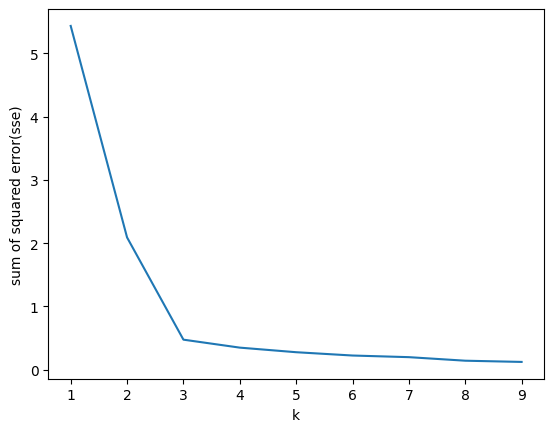

In [36]:
plt.xlabel('k')
plt.ylabel('sum of squared error(sse)')
plt.plot(k_range,sse)

here we got k=3 as the elbow which is true for our data set as we have already choose k=3 above for our data set
 this tells us that k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

print(sse)
plt.xlabel('k')
plt.ylabel('sum of squared error(sse)')
plt.plot(k_range,sse)

this approach can be used to knolw the k in data sets